# Importing Necessary Packages

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.simplefilter('ignore')
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly
plotly.offline.init_notebook_mode() # For not show up chart error
import matplotlib.animation as animation
from IPython.display import HTML
from tqdm import tqdm


Output hidden; open in https://colab.research.google.com to view.

In [3]:
def RMSLE(pred,actual):
    return np.sqrt(np.mean(np.power((np.log(pred+1)-np.log(actual+1)),2)))

In [4]:
train=pd.read_csv(r"/content/drive/My Drive/predictive_analysis_project/COLAB file/train.csv")
test=pd.read_csv(r"/content/drive/My Drive/predictive_analysis_project/COLAB file/test.csv")

In [5]:
train.sample(6) 

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
5706,8137,Zhejiang,China,2020-02-27,1205.0,1.0
19415,27726,Wyoming,US,2020-02-16,0.0,0.0
3605,5136,Chongqing,China,2020-02-26,576.0,6.0
9136,13037,NaN,Holy See,2020-02-27,0.0,0.0
5334,7615,Sichuan,China,2020-02-05,301.0,1.0
7248,10339,NaN,Estonia,2020-02-29,1.0,0.0


In [6]:
test.sample(6)

,ForecastId,Province_State,Country_Region,Date
12490,12491,NaN,Venezuela,2020-04-08
408,409,New South Wales,Australia,2020-04-09
2102,2103,NaN,Chile,2020-04-26
5723,5724,NaN,Iceland,2020-03-23
6171,6172,NaN,Jordan,2020-04-10
2346,2347,Guangdong,China,2020-04-12


In [7]:
test.tail()

,ForecastId,Province_State,Country_Region,Date
12637,12638,NaN,Zimbabwe,2020-04-26
12638,12639,NaN,Zimbabwe,2020-04-27
12639,12640,NaN,Zimbabwe,2020-04-28
12640,12641,NaN,Zimbabwe,2020-04-29
12641,12642,NaN,Zimbabwe,2020-04-30


# EDA

In [8]:
df = train.fillna('NA').groupby(['Country_Region','Province_State','Date'])['ConfirmedCases'].sum() \
                          .groupby(['Country_Region','Province_State']).max().sort_values() \
                          .groupby(['Country_Region']).sum().sort_values(ascending = False)

top10 = pd.DataFrame(df).head(10)
top10

,ConfirmedCases
Country_Region,
US,188018.0
Italy,105792.0
Spain,95923.0
China,82280.0
Germany,71808.0
France,52827.0
Iran,44605.0
United Kingdom,25471.0
Switzerland,16605.0


In [9]:
fig = px.bar(top10, x=top10.index, y='ConfirmedCases', labels={'x':'Country'},
             color="ConfirmedCases", color_continuous_scale=px.colors.sequential.Brwnyl)

fig.update_layout(title_text='Confirmed COVID-19 cases by country')
fig.show()

Confirmed COVID-19 cases per day in US

In [10]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'US') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)

fig.update_layout(title_text='Confirmed COVID-19 cases per day in US')
fig.show()

In [11]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'Italy') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)

fig.update_layout(title_text='Confirmed COVID-19 cases per day in Italy')
fig.show()

In [12]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'China') &(df_by_date.Date >= '2020-01-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)

fig.update_layout(title_text='Confirmed COVID-19 cases per day in China')
fig.show()


In [13]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'Spain') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)

fig.update_layout(title_text='Confirmed COVID-19 cases per day in Spain')
fig.show()

In [14]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'Germany') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)

fig.update_layout(title_text='Confirmed COVID-19 cases per day in Germany')
fig.show()

In [15]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'India') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)

fig.update_layout(title_text='Confirmed COVID-19 cases per day in India')
fig.show()

In [16]:
df=train.groupby(['Date','Country_Region']).agg('sum').reset_index()
df.tail(5)

,Date,Country_Region,Id,ConfirmedCases,Fatalities
12105,2020-03-31,Uzbekistan,28970,172.0,2.0
12106,2020-03-31,Venezuela,29070,135.0,3.0
12107,2020-03-31,Vietnam,29170,212.0,0.0
12108,2020-03-31,Zambia,29270,35.0,0.0
12109,2020-03-31,Zimbabwe,29370,8.0,1.0


# Time evaluation

In [17]:
def pltCountry_cases(ConfirmedCases,*argv):
    f, ax=plt.subplots(figsize=(16,5))
    labels=argv
    for a in argv: 
        country=df.loc[(df['Country_Region']==a)]
        plt.plot(country['Date'],country['ConfirmedCases'],linewidth=3)
        plt.xticks(rotation=40)
        plt.legend(labels)
        ax.set(title='Evolution of the number of cases' )

In [18]:
def pltCountry_fatalities(Fatalities,*argv):
    f, ax=plt.subplots(figsize=(16,5))
    labels=argv
    for a in argv: 
        country=df.loc[(df['Country_Region']==a)]
        plt.plot(country['Date'],country['Fatalities'],linewidth=3)
        plt.xticks(rotation=40)
        plt.legend(labels)
        ax.set(title='Evolution of the number of fatalities' )

Time Series in China

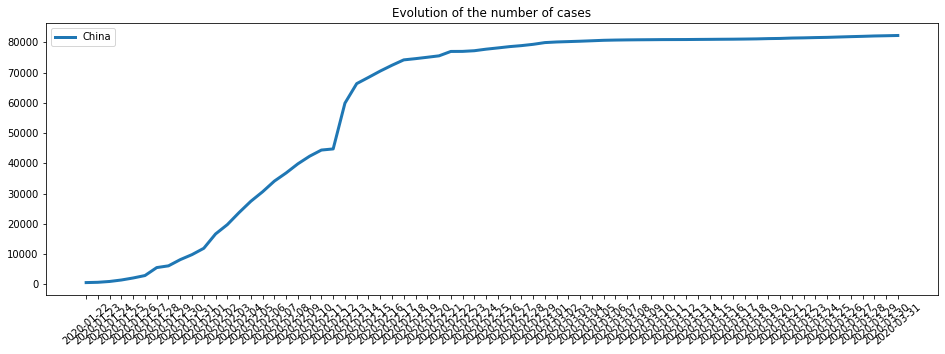

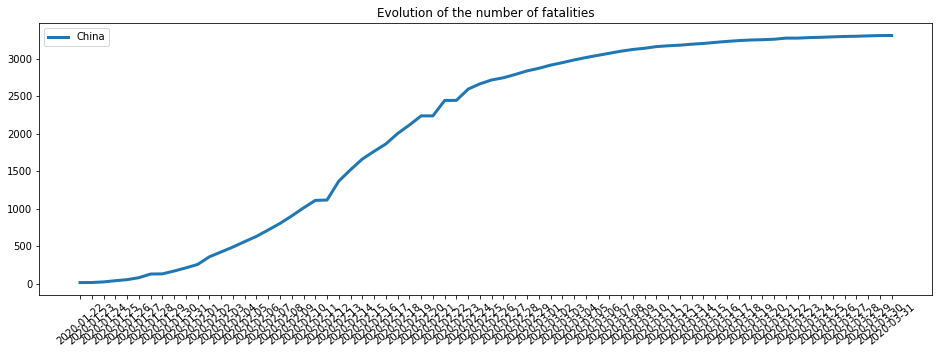

In [19]:
pltCountry_cases('ConfirmedCases','China')
pltCountry_fatalities('Fatalities','China')

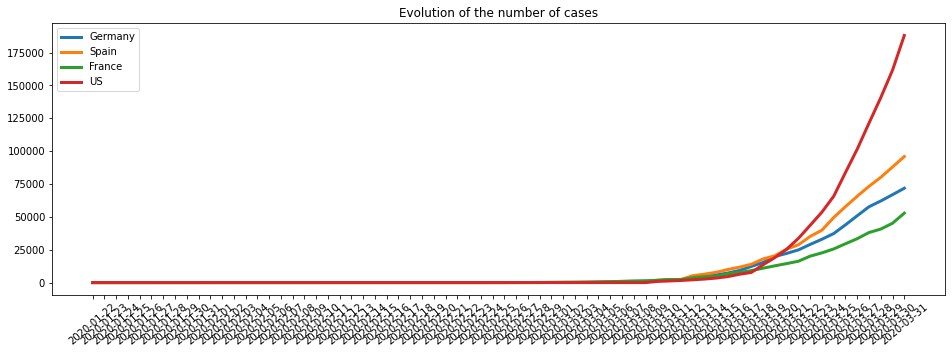

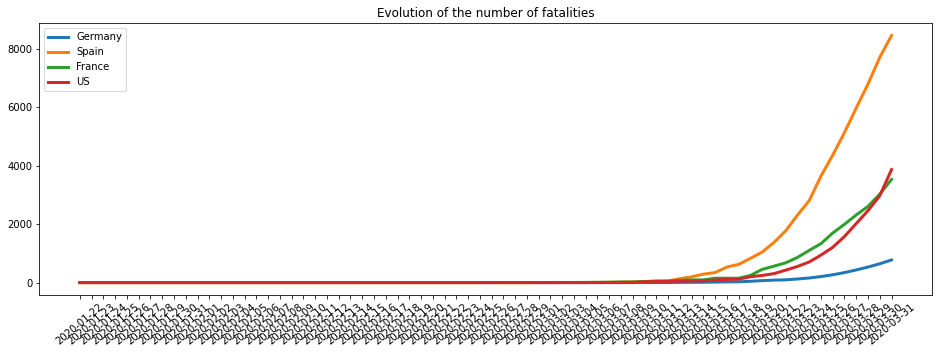

In [20]:
pltCountry_cases('ConfirmedCases', 'Germany','Spain','France','US')
pltCountry_fatalities('Fatilities','Germany','Spain','France','US')

In [21]:
test['Date'] = pd.to_datetime(test['Date'])
train['Date'] = pd.to_datetime(train['Date'])

In [22]:
case='ConfirmedCases'
def timeCompare(time,*argv):
    Coun1=argv[0]
    Coun2=argv[1]
    f,ax=plt.subplots(figsize=(16,5))
    labels=argv  
    country=df.loc[(df['Country_Region']==Coun1)]
    plt.plot(country['Date'],country[case],linewidth=2)
    plt.xticks([])
    plt.legend(labels)
    ax.set(title=' Evolution of actual cases',ylabel='Number of cases' )

    country2=df.loc[df['Country_Region']==Coun2]


    plt.plot(country2['Date'],country2[case],linewidth=2)
   
    plt.legend(labels)
    ax.set(title=' Evolution of cases in %d days difference '%time ,ylabel='Number of %s cases'%case )

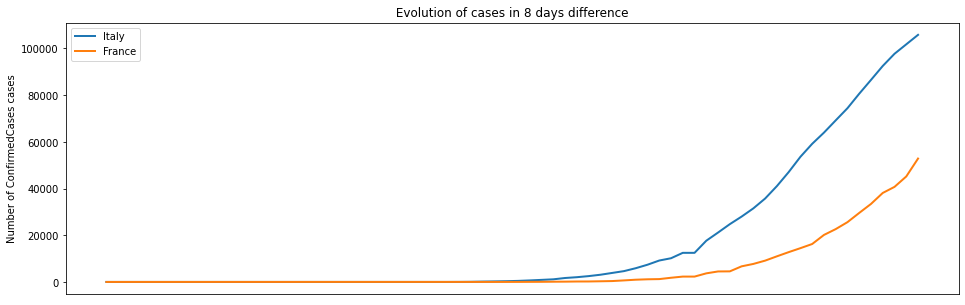

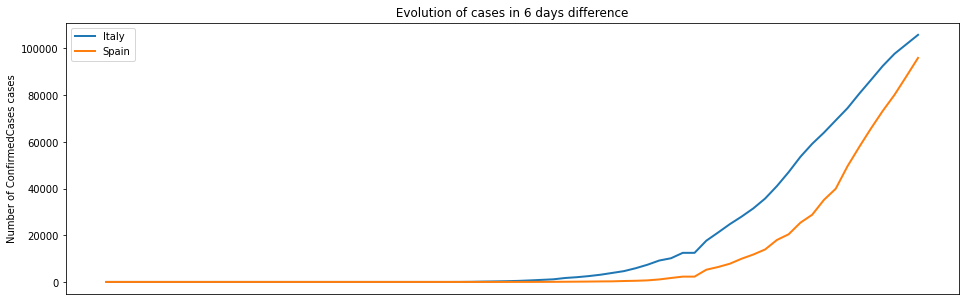

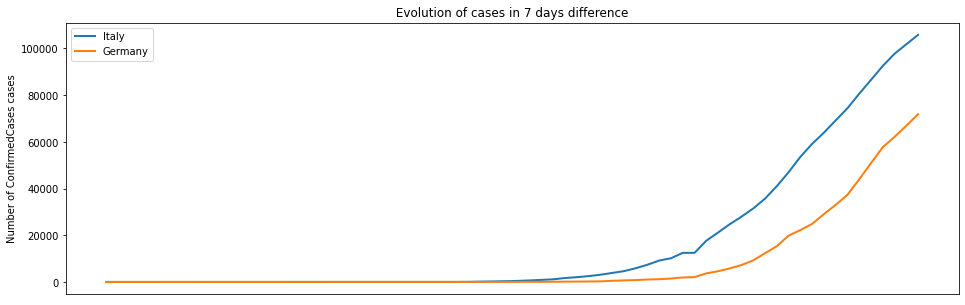

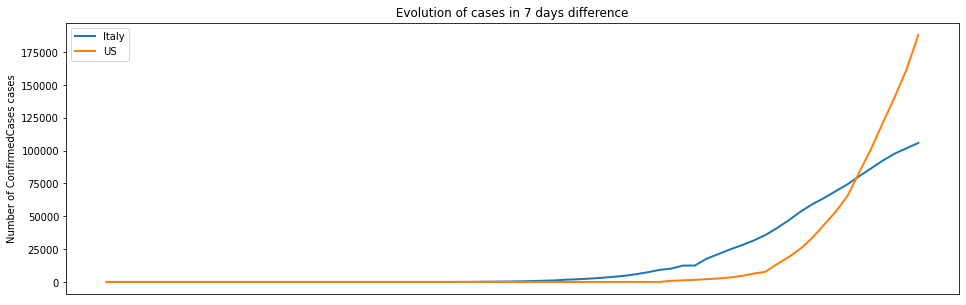

In [23]:
timeCompare(8,'Italy','France')
timeCompare(6,'Italy','Spain')
timeCompare(7,'Italy','Germany')
timeCompare(7,'Italy','US')

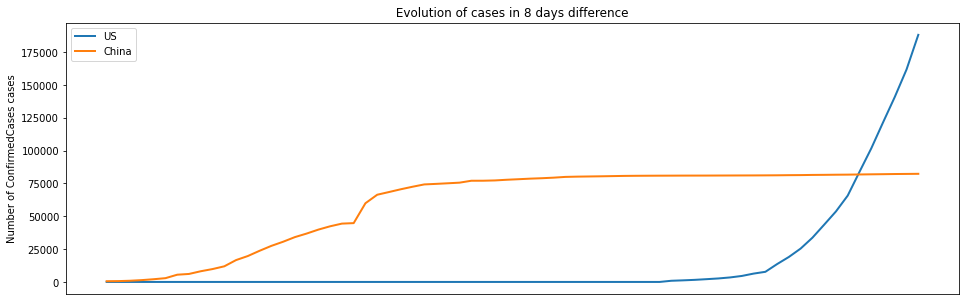

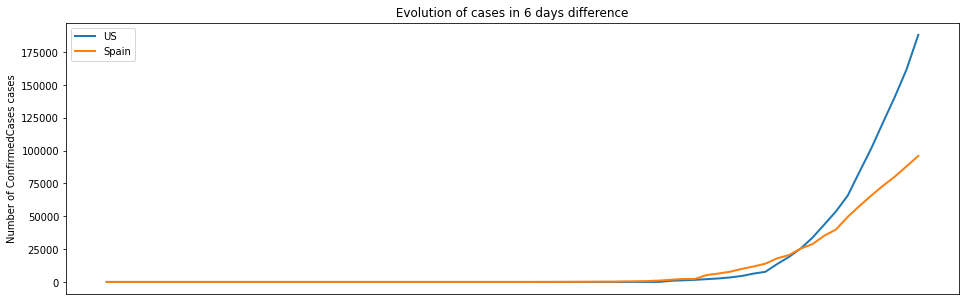

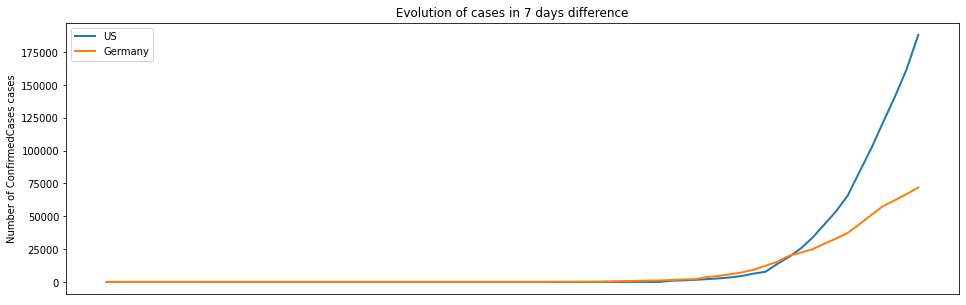

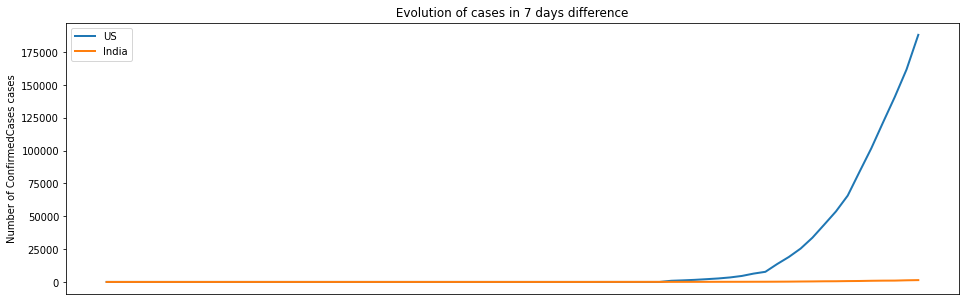

In [24]:
timeCompare(8,'US','China')
timeCompare(6,'US','Spain')
timeCompare(7,'US','Germany')
timeCompare(7,'US','India')

In [25]:
case='Fatalities'
def timeCompare_f(time,*argv):
    Coun1=argv[0]
    Coun2=argv[1]
    f,ax=plt.subplots(figsize=(16,5))
    labels=argv  
    country=df.loc[(df['Country_Region']==Coun1)]
    plt.plot(country['Date'],country[case],linewidth=2)
    plt.xticks([])
    plt.legend(labels)
    ax.set(title=' Evolution of actual cases',ylabel='Number of cases' )

    country2=df.loc[df['Country_Region']==Coun2]
   
    plt.plot(country2['Date'],country2[case],linewidth=2)

    plt.legend(labels)
    ax.set(title=' Evolution of Fatalities in %d days difference '%time ,ylabel='Number of %s cases'%case )

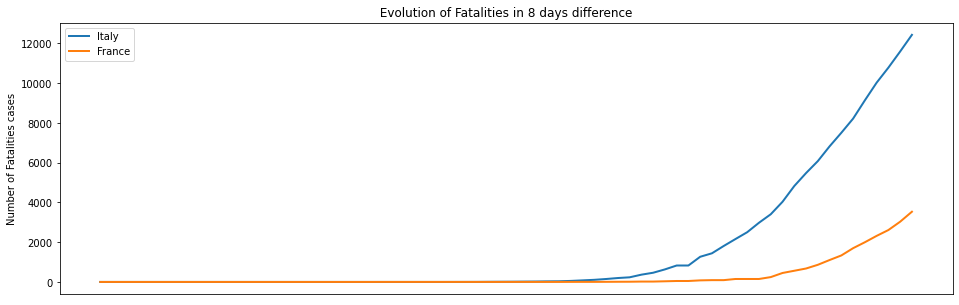

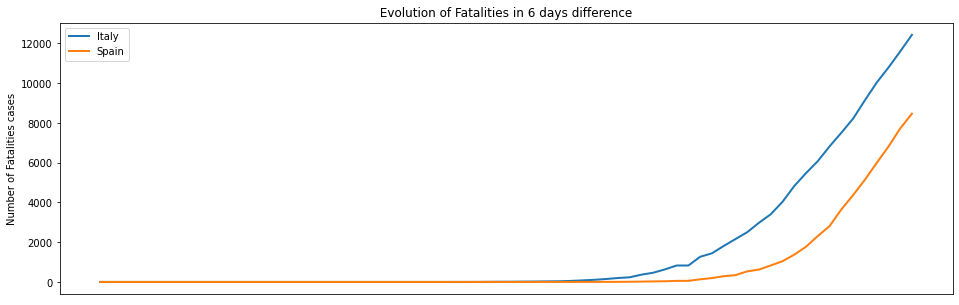

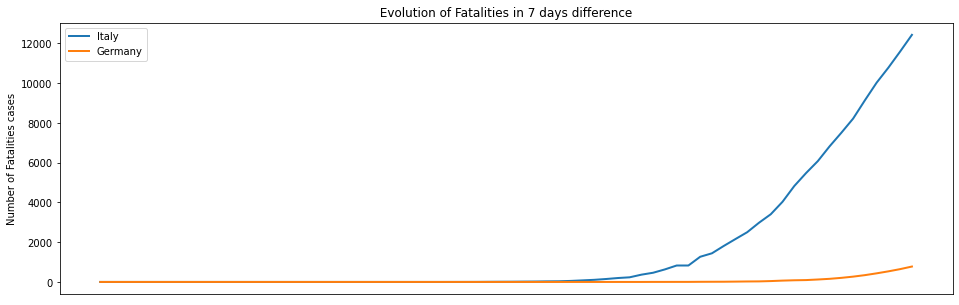

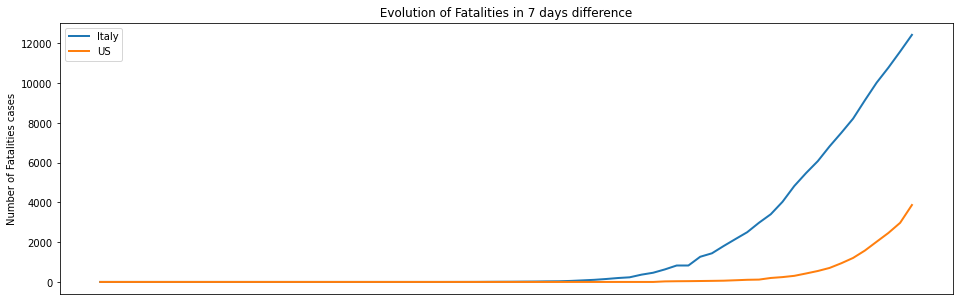

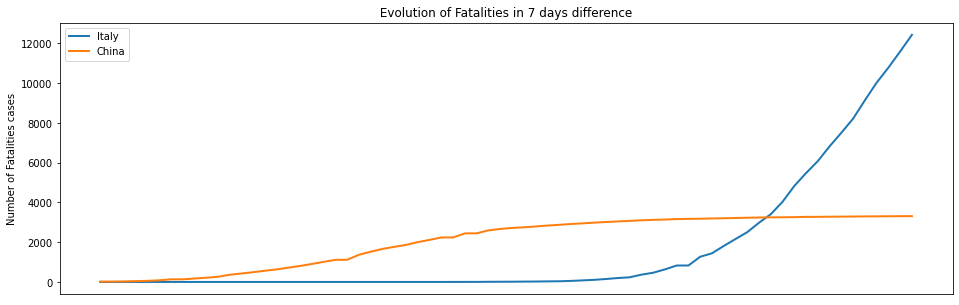

In [26]:
timeCompare_f(8,'Italy','France')
timeCompare_f(6,'Italy','Spain')
timeCompare_f(7,'Italy','Germany')
timeCompare_f(7,'Italy','US')
timeCompare_f(7,'Italy','China')

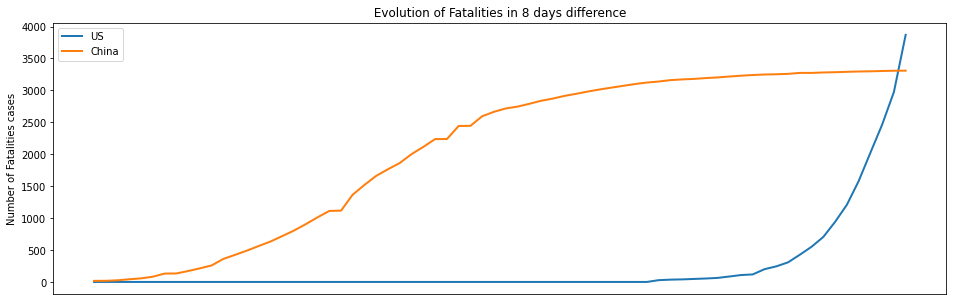

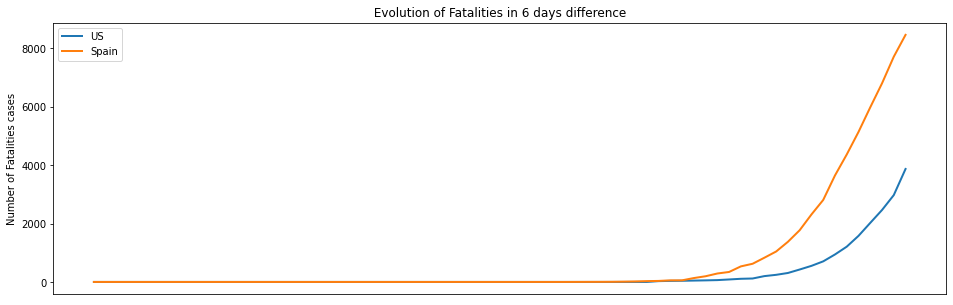

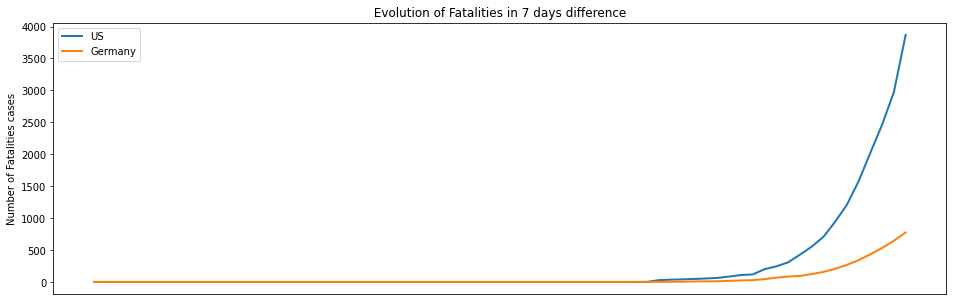

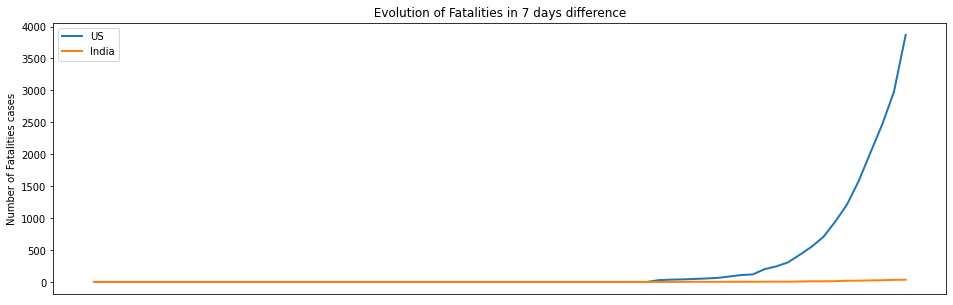

In [27]:
timeCompare_f(8,'US','China')
timeCompare_f(6,'US','Spain')
timeCompare_f(7,'US','Germany')
timeCompare_f(7,'US','India')

# ARIMA

Cases Distribution with Rolling mean and standard deviation

In [28]:
sns.set(palette = 'Set1',style='darkgrid')

def roll(country,case='ConfirmedCases'):
    ts=df.loc[(df['Country_Region']==country)]  
    ts=ts[['Date',case]]
    ts=ts.set_index('Date')
    ts.astype('int64')
    a=len(ts.loc[(ts['ConfirmedCases']>=10)])
    ts=ts[-a:]
    return (ts.rolling(window=4,center=False).mean().dropna())


def rollPlot(country, case='ConfirmedCases'):
    ts=df.loc[(df['Country_Region']==country)]  
    ts=ts[['Date',case]]
    ts=ts.set_index('Date')
    ts.astype('int64')
    a=len(ts.loc[(ts['ConfirmedCases']>=10)])
    ts=ts[-a:]
    plt.figure(figsize=(16,6))
    plt.plot(ts.rolling(window=7,center=False).mean().dropna(),label='Rolling Mean')
    plt.plot(ts[case])
    plt.plot(ts.rolling(window=7,center=False).std(),label='Rolling std')
    plt.legend()
    plt.title('Cases distribution in %s with rolling mean and standard' %country)
    plt.xticks([])

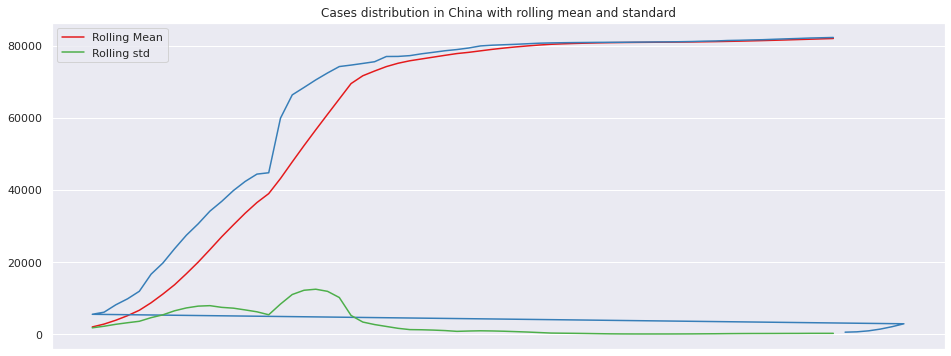

In [29]:
tsC1=roll('China')
rollPlot('China')

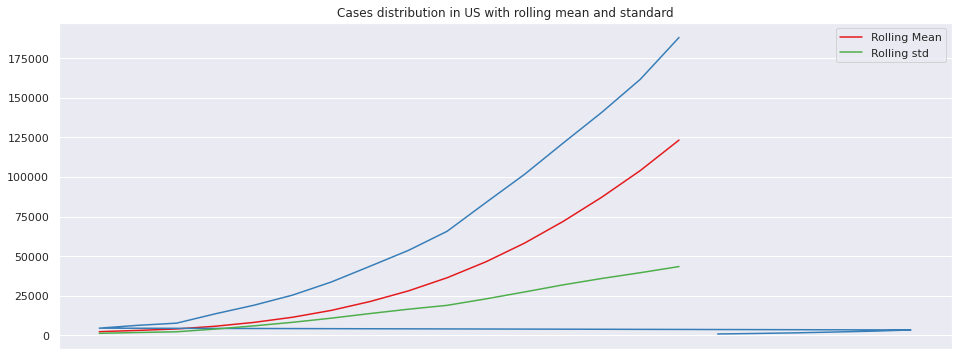

In [30]:
tsC2=roll('US')
rollPlot('US')

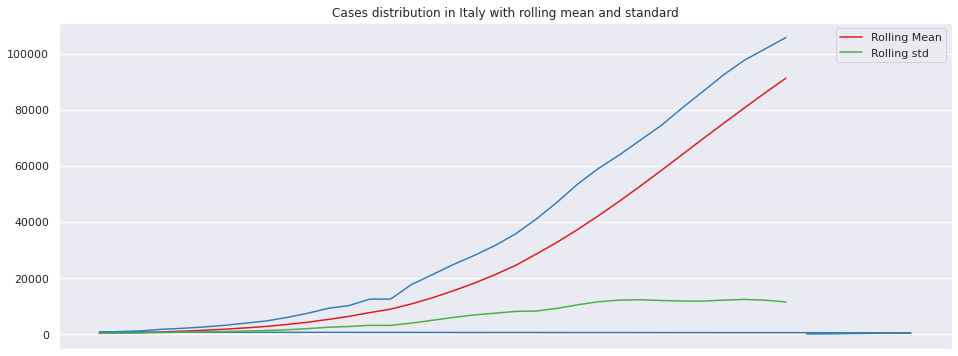

In [31]:
tsC3=roll('Italy')
rollPlot('Italy')

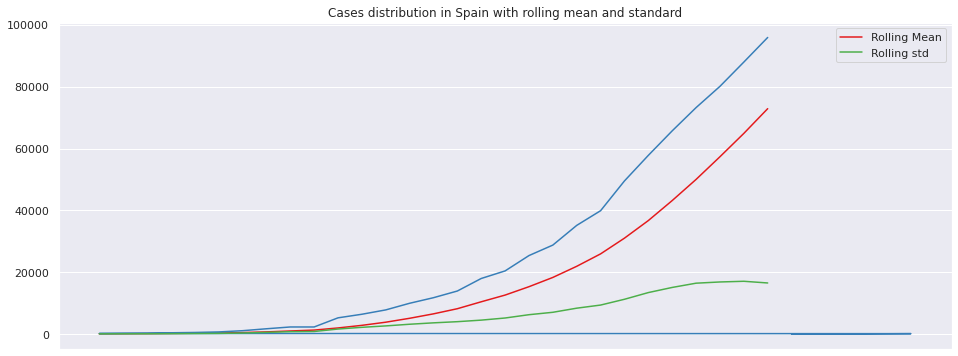

In [32]:
tsC4=roll('Spain')
rollPlot('Spain')

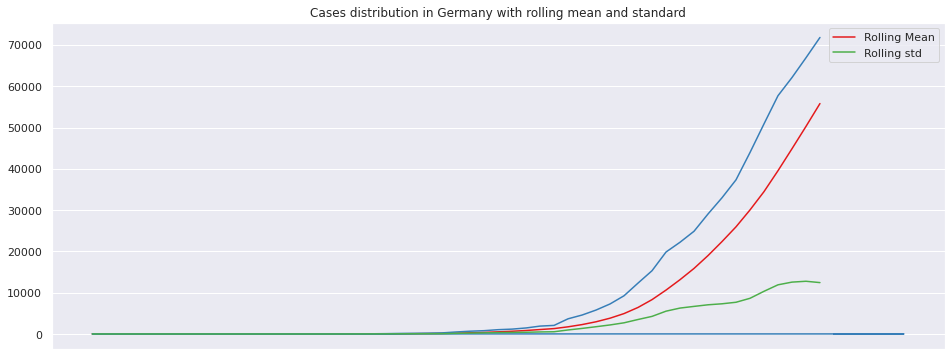

In [33]:
tsC5=roll('Germany')
rollPlot('Germany')

Decomposing the data

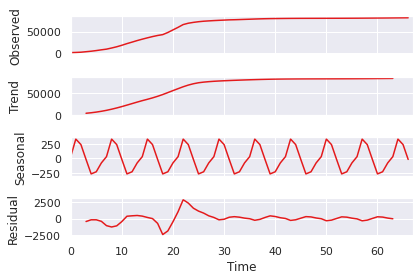

In [34]:
#Decomposing the ts to find its properties
fig=sm.tsa.seasonal_decompose(tsC1.values,freq=7).plot()

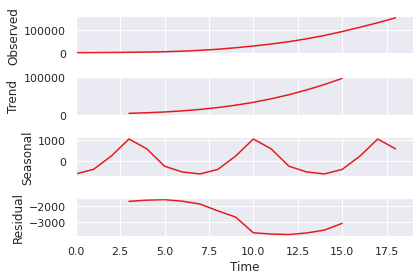

In [35]:
fig=sm.tsa.seasonal_decompose(tsC2.values,freq=7).plot()

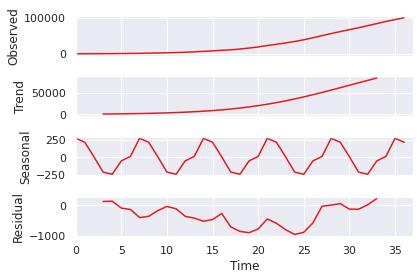

In [36]:
fig=sm.tsa.seasonal_decompose(tsC3.values,freq=7).plot()

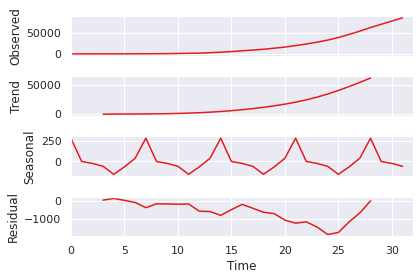

In [37]:
fig=sm.tsa.seasonal_decompose(tsC4.values,freq=7).plot()

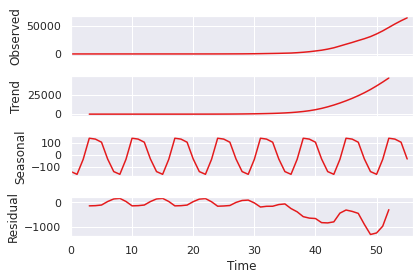

In [38]:
fig=sm.tsa.seasonal_decompose(tsC5.values,freq=7).plot()

Data Stationarity and transformation

In [39]:
#Function to check the stationarity of the time serie using Dickey fuller test
def stationarity(ts):
    print('Results of Dickey-Fuller Test:')
    test = adfuller(ts, autolag='AIC')
    results = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for i,val in test[4].items():
        results['Critical Value (%s)'%i] = val
    print (results)

#For China
tsC=tsC1['ConfirmedCases'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                 -3.482892
p-value                         0.008437
#Lags Used                      5.000000
Number of Observations Used    61.000000
Critical Value (1%)            -3.542413
Critical Value (5%)            -2.910236
Critical Value (10%)           -2.592745
dtype: float64


In [40]:
#For US
tsC=tsC2['ConfirmedCases'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                 -1.351228
p-value                         0.605422
#Lags Used                      7.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


In [41]:
#For Italy
tsC=tsC3['ConfirmedCases'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                 -4.834676
p-value                         0.000047
#Lags Used                      5.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


In [42]:
#For Spain
tsC=tsC4['ConfirmedCases'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                 -3.889416
p-value                         0.002114
#Lags Used                     10.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


In [43]:
#For Germany
tsC=tsC5['ConfirmedCases'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                 -0.186554
p-value                         0.940105
#Lags Used                      8.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64


Here the p-value helps us to reject the null hypothesis of the non-stationarity of the data with confidence, but that assumption is sometimes not enough, we should also consider the time series might not be an AR(auto-regression).
This supposedly means that the parameter i(d) will be 0 and the model would be an ARMA model.

AUTO Correlation

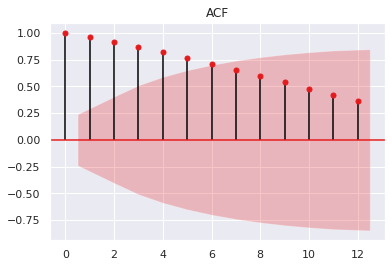

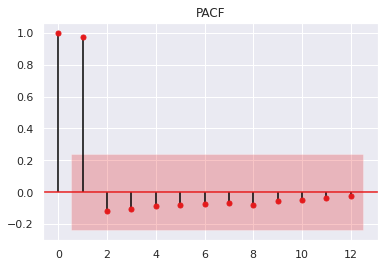

In [44]:
def corr(ts):
    plot_acf(ts,lags=12,title="ACF")# Auto Correlation
    plot_pacf(ts,lags=12,title="PACF")# Partial Auto Correlation
    

#For China
corr(tsC1)

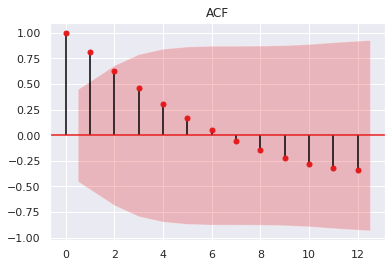

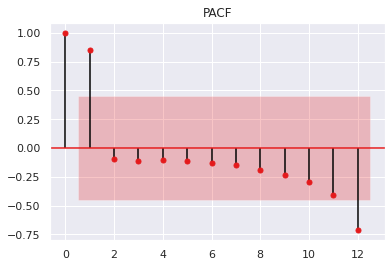

In [45]:
#For US
corr(tsC2)

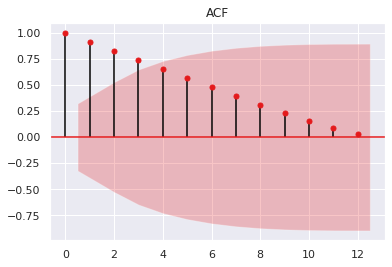

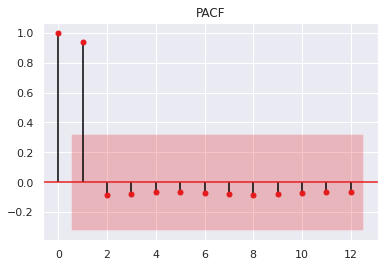

In [46]:
#For Italy
corr(tsC3)

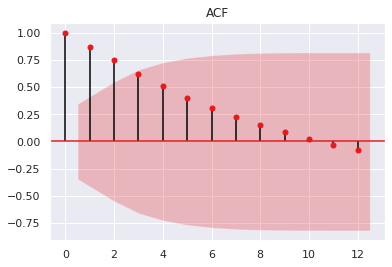

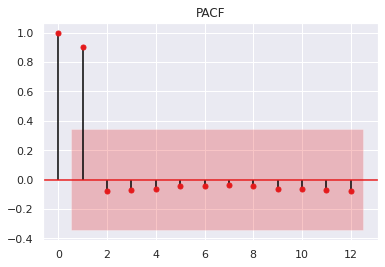

In [47]:
#For Spain
corr(tsC4)

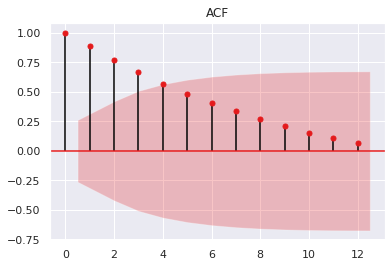

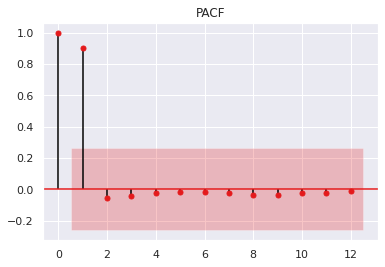

In [48]:
#For Germany
corr(tsC5)

Model Building

In [49]:
train = train.set_index(['Date'])
test = test.set_index(['Date'])

In [50]:

def create_features(df,label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['Date'] = df.index
    df['hour'] = df['Date'].dt.hour
    df['dayofweek'] = df['Date'].dt.dayofweek
    df['quarter'] = df['Date'].dt.quarter
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year
    df['dayofyear'] = df['Date'].dt.dayofyear
    df['dayofmonth'] = df['Date'].dt.day
    df['weekofyear'] = df['Date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
   
    return X

In [51]:
train_features=pd.DataFrame(create_features(train))
test_features=pd.DataFrame(create_features(test))
features_and_target_train = pd.concat([train,train_features], axis=1)
features_and_target_test = pd.concat([test,test_features], axis=1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def FunLabelEncoder(df):
    for c in df.columns:
        if df.dtypes[c] == object:
            le.fit(df[c].astype(str))
            df[c] = le.transform(df[c].astype(str))
    return df
features_and_target_train= FunLabelEncoder(features_and_target_train)

In [52]:
x_train= features_and_target_train[['Country_Region','month', 'dayofyear', 'dayofmonth' , 'weekofyear']]
y1 = features_and_target_train[['ConfirmedCases']]
y2 =features_and_target_train[['Fatalities']]
x_test = features_and_target_test[['Country_Region', 'month', 'dayofyear', 'dayofmonth' , 'weekofyear']]


                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   45
Model:                 ARIMA(0, 2, 4)   Log Likelihood                -278.742
Method:                       css-mle   S.D. of innovations            109.631
Date:                Thu, 02 Jul 2020   AIC                            569.484
Time:                        11:02:24   BIC                            580.324
Sample:                             2   HQIC                           573.525
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.5359     67.594      0.481      0.633     -99.945     165.017
ma.L1.D2.y     0.6779      0.142      4.777      0.000       0.400       0.956
ma.L2.D2.y     1.3737      0.172      7.967      0.0

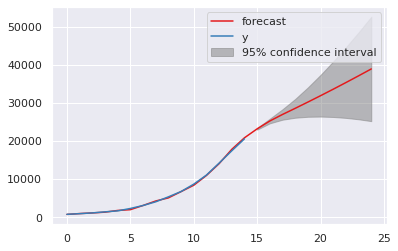

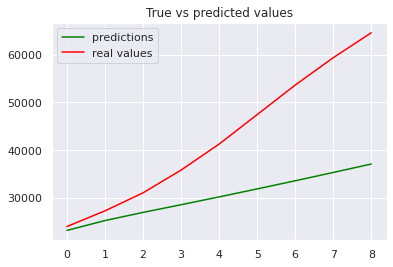

In [53]:
#Mean absolute percentage error
def mape(y1, y_pred): 
    y1, y_pred = np.array(y1), np.array(y_pred)
    return np.mean(np.abs((y1 - y_pred) / y1)) * 100

def split(ts):
    #splitting 85%/15% because of little amount of data
    size = int(len(ts) * 0.85)
    train= ts[:size]
    test = ts[size:]
    return(train,test)


#Arima modeling for ts
def arima(ts,test):
    p=d=q=range(0,6)
    a=99999
    pdq=list(itertools.product(p,d,q))
    
    #Determining the best parameters
    for var in pdq:
        try:
            model = ARIMA(ts, order=var)
            result = model.fit()

            if (result.aic<=a) :
                a=result.aic
                param=var
        except:
            continue
            
    #Modeling
    model = ARIMA(ts, order=param)
    result = model.fit()
    result.plot_predict(start=int(len(ts) * 0.7), end=int(len(ts) * 1.2))
    pred=result.forecast(steps=len(test))[0]
    
    #Plotting results
    f,ax=plt.subplots()
    plt.plot(pred,c='green', label= 'predictions')
    plt.plot(test, c='red',label='real values')
    plt.legend()
    plt.title('True vs predicted values')

    #Printing the error metrics
    print(result.summary())        
    
    print('\nMean absolute percentage error: %f'%mape(test,pred))
    return (pred)



train,test=split(tsC)
pred=arima(train,test)

The above obtained graphs are Forecasted and predicted cases in coming week

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   45
Model:                 ARIMA(0, 2, 4)   Log Likelihood                -278.742
Method:                       css-mle   S.D. of innovations            109.631
Date:                Thu, 02 Jul 2020   AIC                            569.484
Time:                        11:02:34   BIC                            580.324
Sample:                             2   HQIC                           573.525
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.5359     67.594      0.481      0.633     -99.945     165.017
ma.L1.D2.y     0.6779      0.142      4.777      0.000       0.400       0.956
ma.L2.D2.y     1.3737      0.172      7.967      0.0

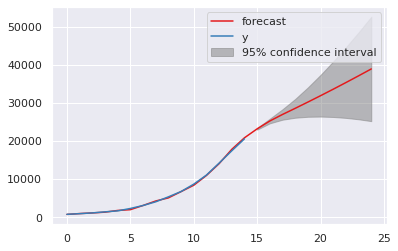

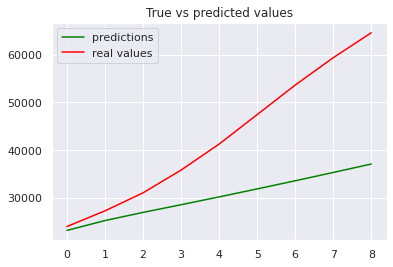

In [54]:
#Mean absolute percentage error
def mape(y2, y_pred): 
    y2, y_pred = np.array(y2), np.array(y_pred)
    return np.mean(np.abs((y2 - y_pred) / y2)) * 100

def split(ts):
    #splitting 85%/15% because of little amount of data
    size = int(len(ts) * 0.85)
    train= ts[:size]
    test = ts[size:]
    return(train,test)


#Arima modeling for ts
def arima(ts,test):
    p=d=q=range(0,6)
    a=99999
    pdq=list(itertools.product(p,d,q))
    
    #Determining the best parameters
    for var in pdq:
        try:
            model = ARIMA(ts, order=var)
            result = model.fit()

            if (result.aic<=a) :
                a=result.aic
                param=var
        except:
            continue
            
    #Modeling
    model = ARIMA(ts, order=param)
    result = model.fit()
    result.plot_predict(start=int(len(ts) * 0.7), end=int(len(ts) * 1.2))
    pred=result.forecast(steps=len(test))[0]
    
    #Plotting results
    f,ax=plt.subplots()
    plt.plot(pred,c='green', label= 'predictions')
    plt.plot(test, c='red',label='real values')
    plt.legend()
    plt.title('True vs predicted values')
    #Printing the error metrics
    print(result.summary())        
    
    print('\nMean absolute percentage error: %f'%mape(test,pred))
    return (pred)



train,test=split(tsC)
pred=arima(train,test)